In [3]:
%%capture
!pip install plotly
!pip install nltk
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Visualisierungen
- Mean Sentiment over time per party
- Sentiment per MP
-  M√§nnliche vs. weibliche Politiker vergleich
- Minority vergleich (√ºberhaupt m√∂glich?)
- Hate unter Politikern
- Wordclouds

In [2]:
df = pd.read_csv("../full_datasets/politicians_mentions_predicted.csv")
#df = df.drop(['Unnamed: 0'], axis=1)
df.head()
df = df.drop_duplicates()
len(df)

/tmp/ipykernel_4363/2912122355.py:1: DtypeWarning:

Columns (0,1,2,6) have mixed types. Specify dtype option on import or set low_memory=False.



620587

In [3]:
df.head(5)

Unnamed: 0.1 index Unnamed: 0     author_id         username  \
0            0     0          0  8.098958e+08       GtzFrmming   
1            1     1          1  8.109576e+17   PetrBystronAfD   
2            2     2          2  7.293602e+17     Marcus_Buehl   
3            3     3          3  7.133614e+17       StBrandner   
4            4     4          4  9.177563e+17  JuergenBraunAfD   

   author_followers author_tweets  \
0           19656.0         17975   
1           21643.0         10673   
2            2798.0           992   
3           38579.0         31499   
4            6386.0         11393   

                                  author_description          author_location  \
0  MdB, Parlamentarischer Gesch√§ftsf√ºhrer, Mitgli...      Berlin, Deutschland   
1  üá©üá™ Aussenpolitischer Sprecher der @AfDimBundes...          M√ºnchen, Bayern   
2  Mitglied der AfD-Bundestagsfraktion, Mitglied ...   Th√ºringen, Deutschland   
3  Industriekaufmann, Rechtsanwalt, MdBüá©üá™ - direk...      Mal hier, mal da...   
4  @AfDimBundestag-Abgeordneter | Sprecher f√ºr #M...  Waiblingen, Deutschland   

                                                text  \
0  ‚ÄûDekolonialisierung‚Äú: Berlin benennt L√ºderitzs...   
1  @BeiRainer Aha. Und wer entschied, was eine "F...   
2  Heute waren Steffen Janich &amp; ich wieder be...   
3  @Karl_Lauterbach Wer jemanden anzeigt...üòâ\nhtt...   
4  Nur 2 Spieler wollten d√ºmmliche Polit-M√§tzchen...   

                  created_at  quote_count  retweets  replies  likes Partei  \
0  2022-12-04 23:23:16+00:00          3.0      21.0     42.0   51.0    AfD   
1  2022-12-04 19:32:15+00:00          0.0       1.0      1.0    3.0    AfD   
2  2022-12-04 19:11:40+00:00          0.0       2.0      0.0    7.0    AfD   
3  2022-12-04 18:54:10+00:00          1.0       5.0      5.0   81.0    AfD   
4  2022-12-04 17:29:08+00:00          1.0      17.0      5.0   71.0    AfD   

   model_predictions  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                1.0

In [4]:
new = []
for index, row in df.iterrows():
    try:
        tolists = ast.literal_eval(row["mentioned"])
        new.append(tolists)
    except:
        #row["mentioned"] = []
        new.append("NA")

In [5]:
df["mentioned_list"] = new

In [103]:
df.head(2)

Unnamed: 0.1  index Unnamed: 0              author_id      username  \
0             0      0          1  1435940649572966400.0  CHARLYCAPRI4   
1             1      1          2            528677411.0         jo711   

  author_followers  author_tweets  \
0                1           14.0   
1                6          308.0   

                                  author_description author_location  \
0                                                NaN             NaN   
1  Ewiger Revolluzer :-) ,\nBiker,Hundeverr√ºckt.N...              jo   

                                                text  \
0  @SWagenknecht Sie sind gescheitert ,weil Sie d...   
1  @SWagenknecht Mittlerweile langweilen Sie .\nK...   

                  created_at quote_count retweets  replies  likes  \
0  2022-03-31 23:51:42+00:00           0        0      0.0    0.0   
1  2022-03-31 23:51:27+00:00           0        0      0.0    0.0   

          mentioned           Runs     Partei  model_predictions  \
0  ['SWagenknecht']  Linke_polis_1  Die Linke                  0   
1  ['SWagenknecht']  Linke_polis_1  Die Linke                  0   

   mentioned_list  
0  [SWagenknecht]  
1  [SWagenknecht]

In [104]:
exploded_df = df.explode("mentioned_list")

In [105]:
exploded_df = exploded_df.reset_index()
exploded_df.head(2)

level_0  Unnamed: 0.1  index Unnamed: 0              author_id  \
0        0             0      0          1  1435940649572966400.0   
1        1             1      1          2            528677411.0   

       username author_followers  author_tweets  \
0  CHARLYCAPRI4                1           14.0   
1         jo711                6          308.0   

                                  author_description author_location  ...  \
0                                                NaN             NaN  ...   
1  Ewiger Revolluzer :-) ,\nBiker,Hundeverr√ºckt.N...              jo  ...   

                  created_at quote_count retweets replies  likes  \
0  2022-03-31 23:51:42+00:00           0        0     0.0    0.0   
1  2022-03-31 23:51:27+00:00           0        0     0.0    0.0   

          mentioned           Runs     Partei model_predictions  \
0  ['SWagenknecht']  Linke_polis_1  Die Linke                 0   
1  ['SWagenknecht']  Linke_polis_1  Die Linke                 0   

   mentioned_list  
0    SWagenknecht  
1    SWagenknecht  

[2 rows x 21 columns]

In [106]:
exploded_df['mentioned_list'] = exploded_df['mentioned_list'].map(lambda x: x.lower() if isinstance(x,str) else x)

In [107]:
exploded_df.mentioned_list.head(2)

0    swagenknecht
1    swagenknecht
Name: mentioned_list, dtype: object

## Merge exploded dataframe with extracted twitter usernames to get right party

In [108]:
twitter = pd.read_csv("twitter_usernames_extracted.csv",sep=";")
twitter.head(2)

Unnamed: 0.1  Unnamed: 0      full_name party  \
0             0           0     Sanae Abdi   SPD   
1             1           1  Valentin Abel   FDP   

                                   twitter         username  
0          https://twitter.com/abdisanae']        abdisanae  
1  ['https://twitter.com/Valentin_C_Abel']  Valentin_C_Abel

In [109]:
twitter['username'] = twitter['username'].map(lambda x: x.lower() if isinstance(x,str) else x)

In [110]:
twitter['username'].head(2)

0          abdisanae
1    valentin_c_abel
Name: username, dtype: object

In [111]:
test = exploded_df.merge(twitter, left_on='mentioned_list', right_on='username',suffixes=['', '_'])

In [112]:
test = test.drop(["Unnamed: 0.1_", "Unnamed: 0_", "twitter", "level_0", "username_"],axis=1)
test

Unnamed: 0.1   index Unnamed: 0              author_id  \
0                   0       0          1  1435940649572966400.0   
1                   1       1          2            528677411.0   
2                   2       2          3            762265140.0   
3                   5       5          6  1357858541160259584.0   
4                   6       6          9            762265140.0   
...               ...     ...        ...                    ...   
2766147       1486984  186984    2860922   784800210744647680.0   
2766148       1487391  187391    2861504  1437459734433521664.0   
2766149       1487391  187391    2861504  1437459734433521664.0   
2766150       1487400  187400    2861521   910913583168573440.0   
2766151       1496985  196985    2878860  1280732987731185664.0   

               username author_followers  author_tweets  \
0          CHARLYCAPRI4                1           14.0   
1                 jo711                6          308.0   
2            nimmdenbus             1574       118892.0   
3           MeisterKlar                0          487.0   
4            nimmdenbus             1574       118892.0   
...                 ...              ...            ...   
2766147      ali_spirkl              225         3950.0   
2766148   UlMar80106448              276         3223.0   
2766149   UlMar80106448              276         3223.0   
2766150  AfDimBundestag            80292        11425.0   
2766151       politwelt              351         2859.0   

                                        author_description  \
0                                                      NaN   
1        Ewiger Revolluzer :-) ,\nBiker,Hundeverr√ºckt.N...   
2        Take the bus! Prenez le bus! Mein Herz schl√§gt...   
3          Nichts! ich bin einmalig wie jeder andere auch!   
4        Take the bus! Prenez le bus! Mein Herz schl√§gt...   
...                                                    ...   
2766147        Cosmopolit, Deutschland? Naja, √ºberbewertet   
2766148  Krankenpfleger  - nat√ºrlich geimpft mit dem dr...   
2766149  Krankenpfleger  - nat√ºrlich geimpft mit dem dr...   
2766150  AfD-Fraktion im Deutschen Bundestag https://t....   
2766151  Originaldarstellung ohne Wortverdrehung f√ºr Fr...   

              author_location  \
0                         NaN   
1                          jo   
2                         NaN   
3                         NaN   
4                         NaN   
...                       ...   
2766147                   NaN   
2766148  Freital, Deutschland   
2766149  Freital, Deutschland   
2766150   Berlin, Deutschland   
2766151                   NaN   

                                                      text  ... retweets  \
0        @SWagenknecht Sie sind gescheitert ,weil Sie d...  ...        0   
1        @SWagenknecht Mittlerweile langweilen Sie .\nK...  ...        0   
2        @MarvinWendland1 @SWagenknecht @BinBerlinerIn ...  ...        0   
3        @SWagenknecht Lassen sie sich nicht in die Eck...  ...        0   
4        @SWagenknecht @BinBerlinerIn Sahra, ich habe d...  ...        0   
...                                                    ...  ...      ...   
2766147  @AfDimBundestag @edgar_naujok Ein so ein grind...  ...        0   
2766148  @AfDimBundestag @edgar_naujok E\n@edgar_naujok...  ...        0   
2766149  @AfDimBundestag @edgar_naujok E\n@edgar_naujok...  ...        0   
2766150  "Aus Deutschland eingereiste IS-K√§mpfer haben ...  ...        5   
2766151  Edgar Naujok: ‚ÄûW√§re die deutsche Entwicklungsp...  ...        1   

        replies likes                                          mentioned  \
0           0.0   0.0                                   ['SWagenknecht']   
1           0.0   0.0                                   ['SWagenknecht']   
2           0.0   0.0  ['MarvinWendland1', 'SWagenknecht', 'BinBerlin...   
3           0.0   0.0                                   ['SWagenknecht']   
4           0.0   1.0                  ['SWagenkn

In [127]:
len(test)

2766152

In [113]:
test.to_csv("mentions_predicted_exploded.csv")

## Merge exploded df with MdB dataset to get sex of MP

In [116]:
%%capture
!pip install openpyxl

In [117]:
mdb = pd.read_excel("MdB_20WP_Kontaktdaten.xlsx")
mdb.head()

Name BT Vorname BT Titel Adel Praefix BT_Zusatz Geschlecht  \
0     Abdi      Sanae   NaN  NaN     NaN       NaN       Frau   
1     Abel   Valentin   NaN  NaN     NaN       NaN      Herrn   
2  Abraham       Knut   NaN  NaN     NaN       NaN      Herrn   
3    Adler      Katja   NaN  NaN     NaN       NaN       Frau   
4  Aeffner  Stephanie   NaN  NaN     NaN       NaN       Frau   

  NAME BT Zusammensetzung 1 NAME BT Zusammensetzung 2 Fraktion  ...  BL  \
0                Sanae Abdi               Abdi, Sanae      SPD  ...  NW   
1             Valentin Abel            Abel, Valentin      FDP  ...  BW   
2              Knut Abraham             Abraham, Knut  CDU/CSU  ...  BB   
3               Katja Adler              Adler, Katja      FDP  ...  HE   
4         Stephanie Aeffner        Aeffner, Stephanie  B√ú90/GR  ...  BW   

                            Anrede            Anschrift      Anschrift Stra√üe  \
0    Sehr geehrte Frau Abgeordnete  Deutscher Bundestag  Platz der Republik 1   
1  Sehr geehrter Herr Abgeordneter  Deutscher Bundestag  Platz der Republik 1   
2  Sehr geehrter Herr Abgeordneter  Deutscher Bundestag  Platz der Republik 1   
3    Sehr geehrte Frau Abgeordnete  Deutscher Bundestag  Platz der Republik 1   
4    Sehr geehrte Frau Abgeordnete  Deutscher Bundestag  Platz der Republik 1   

  Anschrift PLZ Anschrift Ort    INTERN                          E-Mail  \
0         11011        Berlin  im Hause         sanae.abdi@bundestag.de   
1         11011        Berlin  im Hause      valentin.abel@bundestag.de   
2         11011        Berlin  im Hause       knut.abraham@bundestag.de   
3         11011        Berlin  im Hause        katja.adler@bundestag.de   
4         11011        Berlin  im Hause  stephanie.aeffner@bundestag.de   

      Vorwahl Vermittlung  
0  +49 30 227           0  
1  +49 30 227           0  
2  +49 30 227           0  
3  +49 30 227           0  
4  +49 30 227           0  

[5 rows x 23 columns]

In [124]:
sex = test.merge(mdb, left_on='full_name', right_on='NAME BT Zusammensetzung 1',suffixes=['', '_'])
sex.head(2)

Unnamed: 0.1  index Unnamed: 0              author_id      username  \
0             0      0          1  1435940649572966400.0  CHARLYCAPRI4   
1             1      1          2            528677411.0         jo711   

  author_followers  author_tweets  \
0                1           14.0   
1                6          308.0   

                                  author_description author_location  \
0                                                NaN             NaN   
1  Ewiger Revolluzer :-) ,\nBiker,Hundeverr√ºckt.N...              jo   

                                                text  ...  BL  \
0  @SWagenknecht Sie sind gescheitert ,weil Sie d...  ...  NW   
1  @SWagenknecht Mittlerweile langweilen Sie .\nK...  ...  NW   

                          Anrede            Anschrift      Anschrift Stra√üe  \
0  Sehr geehrte Frau Abgeordnete  Deutscher Bundestag  Platz der Republik 1   
1  Sehr geehrte Frau Abgeordnete  Deutscher Bundestag  Platz der Republik 1   

   Anschrift PLZ Anschrift Ort    INTERN                          E-Mail  \
0          11011        Berlin  im Hause  sahra.wagenknecht@bundestag.de   
1          11011        Berlin  im Hause  sahra.wagenknecht@bundestag.de   

      Vorwahl Vermittlung  
0  +49 30 227           0  
1  +49 30 227           0  

[2 rows x 45 columns]

In [125]:
sex = sex.drop(["Anrede", "Anschrift", "Anschrift Stra√üe", "Anschrift PLZ", "Anschrift Ort", "INTERN", "E-Mail", "Vorwahl", "Vermittlung"],axis=1)
sex = sex.drop(["Praefix", "BT_Zusatz", "NAME BT Zusammensetzung 1", "NAME BT Zusammensetzung 2", "Fraktion", "Wahlkreis-Nr.", "Wahlkreisname/Bundesland", "BL", "Partei", "Name BT", "Vorname BT", "Titel", "Adel"],axis=1)
sex.head(2)

Unnamed: 0.1  index Unnamed: 0              author_id      username  \
0             0      0          1  1435940649572966400.0  CHARLYCAPRI4   
1             1      1          2            528677411.0         jo711   

  author_followers  author_tweets  \
0                1           14.0   
1                6          308.0   

                                  author_description author_location  \
0                                                NaN             NaN   
1  Ewiger Revolluzer :-) ,\nBiker,Hundeverr√ºckt.N...              jo   

                                                text  ... replies likes  \
0  @SWagenknecht Sie sind gescheitert ,weil Sie d...  ...     0.0   0.0   
1  @SWagenknecht Mittlerweile langweilen Sie .\nK...  ...     0.0   0.0   

          mentioned           Runs  model_predictions mentioned_list  \
0  ['SWagenknecht']  Linke_polis_1                  0   swagenknecht   
1  ['SWagenknecht']  Linke_polis_1                  0   swagenknecht   

               full_name       party Geschlecht Gew√§hlt in Vorperiode  
0  Dr. Sahra Wagenknecht   Die Linke       Frau                    ja  
1  Dr. Sahra Wagenknecht   Die Linke       Frau                    ja  

[2 rows x 23 columns]

In [126]:
len(sex)

2752124

In [128]:
sex.to_csv("mentions_predicted_exploded.csv")

# Data Analysis

In [3]:
# because on mention row was found in the created_at column
df = df[~df['created_at'].astype(str).str.startswith('[')]
df = df[~df['created_at'].astype(str).str.startswith('S')]
df = df[~df['created_at'].astype(str).str.startswith('F')]
df = df[~df['created_at'].astype(str).str.startswith('C')]
df = df[~df['created_at'].astype(str).str.startswith('A')]
df = df[~df['created_at'].astype(str).str.startswith('D')]
df = df[~df['created_at'].astype(str).str.startswith('B')]

In [4]:
df["created_at"][0]

'2022-12-04 23:23:16+00:00'

In [4]:
df["created_at"] = df["created_at"].astype('datetime64[ns]') 
df["created_at"] = df.created_at.dt.to_pydatetime()

In [9]:
len(df)

620587

In [5]:
# Date Spalte erstellen
df["Date"]  = df["created_at"]
#df['Date']= pd.to_datetime(df['Date'])

df["HOF"] = df["model_predictions"]
df.loc[(df.model_predictions == 1),'Label']='HOF'
df.loc[(df.model_predictions == 0),'Label']='NOT'

In [11]:
df.head(2)

Unnamed: 0.1 index Unnamed: 0     author_id        username  \
0            0     0          0  8.098958e+08      GtzFrmming   
1            1     1          1  8.109576e+17  PetrBystronAfD   

   author_followers author_tweets  \
0           19656.0         17975   
1           21643.0         10673   

                                  author_description      author_location  \
0  MdB, Parlamentarischer Gesch√§ftsf√ºhrer, Mitgli...  Berlin, Deutschland   
1  üá©üá™ Aussenpolitischer Sprecher der @AfDimBundes...      M√ºnchen, Bayern   

                                                text  ... quote_count  \
0  ‚ÄûDekolonialisierung‚Äú: Berlin benennt L√ºderitzs...  ...         3.0   
1  @BeiRainer Aha. Und wer entschied, was eine "F...  ...         0.0   

   retweets  replies  likes  Partei model_predictions  mentioned_list  \
0      21.0     42.0   51.0     AfD               0.0              NA   
1       1.0      1.0    3.0     AfD               0.0              NA   

                 Date  HOF  Label  
0 2022-12-04 23:23:16  0.0    NOT  
1 2022-12-04 19:32:15  0.0    NOT  

[2 rows x 21 columns]

In [16]:
#mask = (df['Date'] < '2021-12-31')
#df = df.loc[mask]
#df.head()

In [12]:
df.Partei.value_counts()

B√ºndnis 90/Die Gr√ºnen    130097
FDP                      117681
SPD                       81941
CSU/CDU                   72776
AfD                       49062
Die Linke                 44537
fraktionslos               6838
Name: Partei, dtype: int64

In [10]:
afd = df[df["Partei"] == "AfD"]
cducsu = df[df["Partei"] == "CSU/CDU"]
linke = df[df["Partei"] == "Die Linke"]
fdp = df[df["Partei"] == "FDP"]
gruene = df[df["Partei"] == "B√ºndnis 90/Die Gr√ºnen"]
spd = df[df["Partei"] == "SPD"]

In [11]:
# group by party and look at sentiment distribution per party
afd_pos = afd[afd["model_predictions"] == 0].username.count()
afd_neg = afd[afd["model_predictions"] == 1].username.count()

# group by party and look at sentiment distribution per party
spd_pos = spd[spd["model_predictions"] == 0].username.count()
spd_neg = spd[spd["model_predictions"] == 1].username.count()

# group by party and look at sentiment distribution per party
linke_pos = linke[linke["model_predictions"] == 0].username.count()
linke_neg = linke[linke["model_predictions"] == 1].username.count()

# group by party and look at sentiment distribution per party
fdp_pos = fdp[fdp["model_predictions"] == 0].username.count()
fdp_neg = fdp[fdp["model_predictions"] == 1].username.count()

# group by party and look at sentiment distribution per party
gruene_pos = gruene[gruene["model_predictions"] == 0].username.count()
gruene_neg = gruene[gruene["model_predictions"] == 1].username.count()

# group by party and look at sentiment distribution per party
cducsu_pos = cducsu[cducsu["model_predictions"] == 0].username.count()
cducsu_neg = cducsu[cducsu["model_predictions"] == 1].username.count()

pos = df[df["model_predictions"] == 0].username.count()
neg = df[df["model_predictions"] == 1].username.count()

## Plots over Time

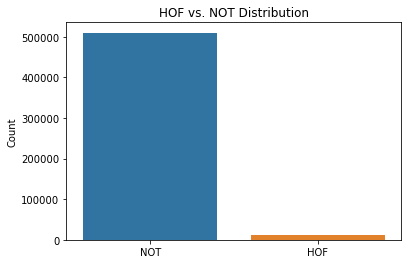

In [12]:
ax = sns.barplot(x=["NOT", "HOF"], y=[pos,neg])
ax.set_title('HOF vs. NOT Distribution')
ax.set_ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')

In [15]:
ax.figure.savefig("./plots/politicians_plots/politicians_hof_distribution.png")

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



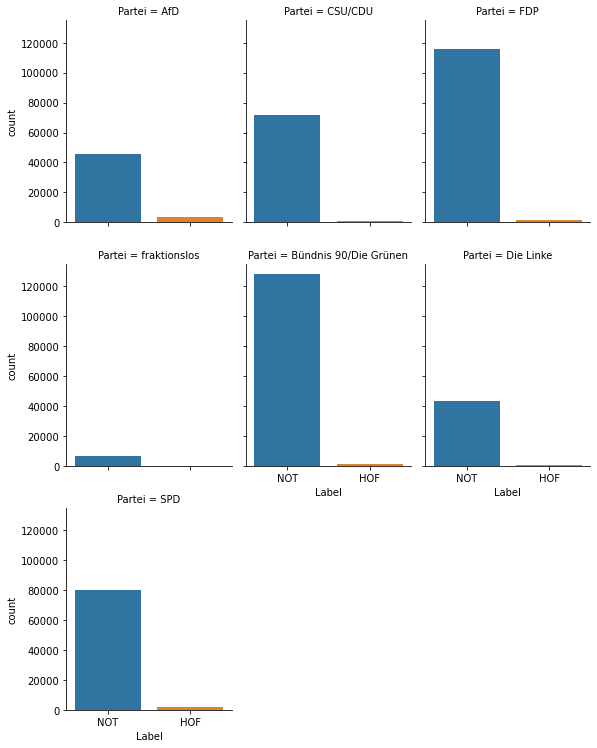

In [16]:
# Plot
g = sns.catplot("Label", col="Partei", col_wrap=3,
                data=df,
                kind="count", height=3.5, aspect=.8, 
                palette='tab10')

#fig.suptitle('sf')
plt.show()
g.savefig('./plots/politicians_plots/politicians_party_hof_distribution.png')

In [40]:
day = []

for index, row in df.iterrows():
    date = row["Date"].date()
    day.append(date)
       
df["day"] = day
df.head(2)

Unnamed: 0.1 index Unnamed: 0     author_id        username  \
0            0     0          0  8.098958e+08      GtzFrmming   
1            1     1          1  8.109576e+17  PetrBystronAfD   

   author_followers author_tweets  \
0           19656.0         17975   
1           21643.0         10673   

                                  author_description      author_location  \
0  MdB, Parlamentarischer Gesch√§ftsf√ºhrer, Mitgli...  Berlin, Deutschland   
1  üá©üá™ Aussenpolitischer Sprecher der @AfDimBundes...      M√ºnchen, Bayern   

                                                text  ... retweets  replies  \
0  ‚ÄûDekolonialisierung‚Äú: Berlin benennt L√ºderitzs...  ...     21.0     42.0   
1  @BeiRainer Aha. Und wer entschied, was eine "F...  ...      1.0      1.0   

   likes  Partei  model_predictions                Date  HOF Label    month  \
0   51.0     AfD                0.0 2022-12-04 23:23:16  0.0   NOT  2022-12   
1    3.0     AfD                0.0 2022-12-04 19:32:15  0.0   NOT  2022-12   

          day  
0  2022-12-04  
1  2022-12-04  

[2 rows x 22 columns]

In [6]:
df['month'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m')

In [12]:
df.head()

Unnamed: 0.1 index Unnamed: 0     author_id         username  \
0            0     0          0  8.098958e+08       GtzFrmming   
1            1     1          1  8.109576e+17   PetrBystronAfD   
2            2     2          2  7.293602e+17     Marcus_Buehl   
3            3     3          3  7.133614e+17       StBrandner   
4            4     4          4  9.177563e+17  JuergenBraunAfD   

   author_followers author_tweets  \
0           19656.0         17975   
1           21643.0         10673   
2            2798.0           992   
3           38579.0         31499   
4            6386.0         11393   

                                  author_description          author_location  \
0  MdB, Parlamentarischer Gesch√§ftsf√ºhrer, Mitgli...      Berlin, Deutschland   
1  üá©üá™ Aussenpolitischer Sprecher der @AfDimBundes...          M√ºnchen, Bayern   
2  Mitglied der AfD-Bundestagsfraktion, Mitglied ...   Th√ºringen, Deutschland   
3  Industriekaufmann, Rechtsanwalt, MdBüá©üá™ - direk...      Mal hier, mal da...   
4  @AfDimBundestag-Abgeordneter | Sprecher f√ºr #M...  Waiblingen, Deutschland   

                                                text  ... retweets  replies  \
0  ‚ÄûDekolonialisierung‚Äú: Berlin benennt L√ºderitzs...  ...     21.0     42.0   
1  @BeiRainer Aha. Und wer entschied, was eine "F...  ...      1.0      1.0   
2  Heute waren Steffen Janich &amp; ich wieder be...  ...      2.0      0.0   
3  @Karl_Lauterbach Wer jemanden anzeigt...üòâ\nhtt...  ...      5.0      5.0   
4  Nur 2 Spieler wollten d√ºmmliche Polit-M√§tzchen...  ...     17.0      5.0   

   likes  Partei  model_predictions                Date  HOF Label    month  \
0   51.0     AfD                0.0 2022-12-04 23:23:16  0.0   NOT  2022-12   
1    3.0     AfD                0.0 2022-12-04 19:32:15  0.0   NOT  2022-12   
2    7.0     AfD                0.0 2022-12-04 19:11:40  0.0   NOT  2022-12   
3   81.0     AfD                0.0 2022-12-04 18:54:10  0.0   NOT  2022-12   
4   71.0     AfD                1.0 2022-12-04 17:29:08  1.0   HOF  2022-12   

          day  
0  2022-12-04  
1  2022-12-04  
2  2022-12-04  
3  2022-12-04  
4  2022-12-04  

[5 rows x 22 columns]

In [48]:
#df['day'] = (i.date() for i in df["Date"])
day_sentiment_df = df.pivot_table(index=['Partei', 'month'], values='model_predictions', aggfunc='mean').reset_index()
day_sentiment_df

Partei    month  model_predictions
0             AfD  2020-01           0.098008
1             AfD  2020-02           0.098266
2             AfD  2020-03           0.061878
3             AfD  2020-04           0.047753
4             AfD  2020-05           0.060606
..            ...      ...                ...
247  fraktionslos  2022-08           0.044898
248  fraktionslos  2022-09           0.013029
249  fraktionslos  2022-10           0.012048
250  fraktionslos  2022-11           0.032609
251  fraktionslos  2022-12           0.000000

[252 rows x 3 columns]

In [73]:
def setup_font(plt):
    # font_manager.fontManager.addfont(FONT_PATH)
    # prop = font_manager.FontProperties(fname=FONT_PATH)

    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams.update({"font.size": 14})
    # plt.rcParams['font.sans-serif'] = prop.get_name()
    return plt

PARTY_COLORS = {
    "SPD": "#E3000F",
    "CSU/CDU": "#000000",
    "B√ºndnis 90/Die Gr√ºnen": "#1AA037",
    "Die Linke": "#800080",
    "FDP": "#FFEF00",
    "AfD": "#0489DB",
}

REG_COLORS = {
    "Government": "#E3000F",
    "Opposition": "#0489DB",
}

PARTY_ORDER = ["SPD", "CSU/CDU", "B√ºndnis 90/Die Gr√ºnen", "FDP", "AfD", "Die Linke"]
REG_ORDER = ["Government", "Opposition"]
POSITIVE_COLOR = "#76B041"  # "#006600"
NEGATIVE_COLOR = "#E4572E"  # "#FF0000"
NEUTRAL_COLOR = "#2E282A"  # "#999999"

FONT_PATH = "fonts/manrope-regular.otf"  #'fonts/LinLibertine_R.ttf'

# Global Plot Settings
sns.set(rc={"figure.dpi": 300})
sns.set(rc={"figure.figsize": (6, 3)})

def ploti_poli_line_graph_for_each_day(df, filename):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.dates as mdates

    sns.set_style("whitegrid")

    # Setup Font
    plt = setup_font(plt)

    _, ax = plt.subplots(figsize=(15, 6))

    # Set figure size and font size
    # plt.figure(figsize=(15, 6))
    plt.rcParams.update({"font.size": 16})

    # Plot the sentiment value for each party and month
    for party in PARTY_ORDER:
        ax.plot(
            df.loc[df["Partei"] == party, "month"],
            df.loc[df["Partei"] == party, "model_predictions"],
            label=party,
            color=PARTY_COLORS[party],
        )
    #df['day'] = pd.to_datetime(df['day'])
    #print(type(df.month[0]))
    # Set x-axis tick labels
   # plt.xticks()
    # set monthly locator
    df['month'] = pd.to_datetime(df['month'])
    print(type(df.month[0]))
    ax.xaxis.set_major_locator(mdates.MonthLocator()) #interval = 1
    plt.xticks(rotation=90)
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    #plt.xticks(df['day'], rotation=90)

    # Add legend, axis labels and title
    legend = ax.legend(loc="upper left", title="Party", ncol=2)
    legend._legend_box.align = "left"
    plt.xlabel("Months of 2021", fontsize=18, labelpad=15)
    plt.ylabel("Mean HOF", x=-2, fontsize=18, labelpad=15)

    plt.grid(alpha=0.5)

    # Add labels for the positive and negative y-axis directions
    plt.text(
        -0.07,
        0.85,
        "HOF ‚Üí",
        transform=ax.transAxes,
        ha="center",
        va="center",
        rotation="vertical",
        fontsize=14,
        color=POSITIVE_COLOR,
    )
    plt.text(
        -0.07,
        0.15,
        "‚Üê NOT",
        transform=ax.transAxes,
        ha="center",
        va="center",
        rotation="vertical",
        fontsize=14,
        color=NEGATIVE_COLOR,
    )

    # Set y-axis limit
    plt.ylim(0, 0.15)

    # Save as svg, png and pdf
    for f_type in [".png"]:
        plt.savefig(filename + f_type, dpi=300, bbox_inches="tight")

    plt.show()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


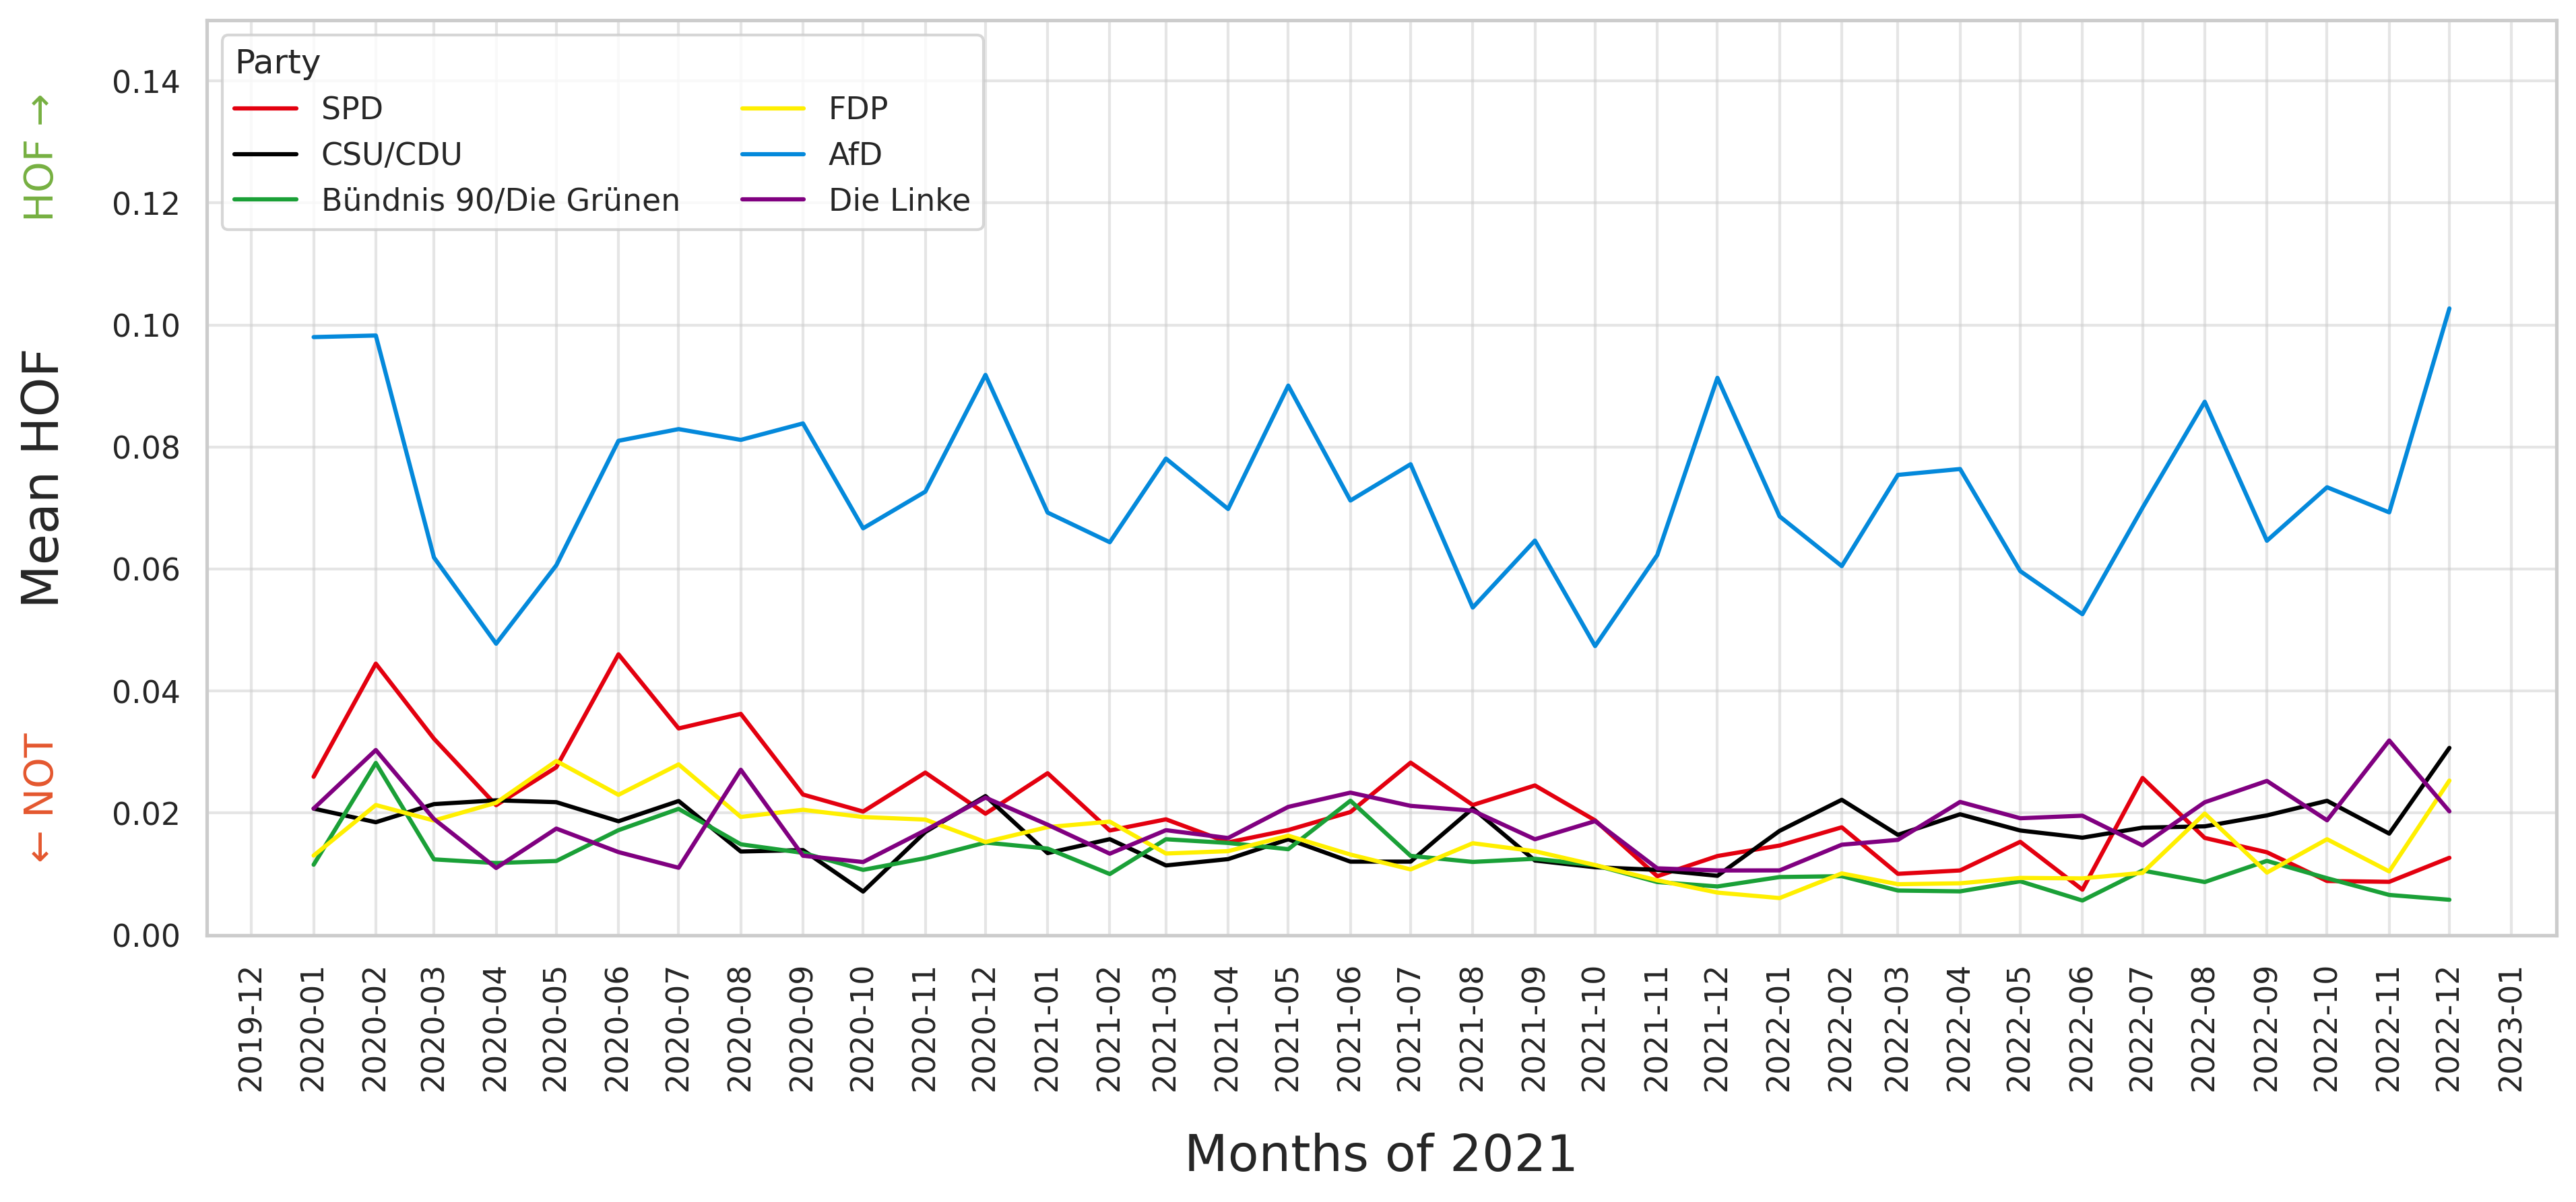

In [74]:
#from time_plots import plot_line_graph_for_each_day, plot_reg_line_graph_for_each_day, plot_percentage, plot_poli_line_graph_for_each_day
#change this graph
ploti_poli_line_graph_for_each_day(day_sentiment_df, "./plots/politicians_plots/politician_hof_party_over_time")

In [162]:
def f_2017(row):
    if row['Partei'] == "AfD":
        val = "Opposition"
    elif row['Partei'] == "Die Linke":
        val = "Opposition"
    elif row['Partei'] == "FDP":
        val = "Opposition"
    elif row['Partei'] == "B√ºndnis 90/Die Gr√ºnen":
        val = "Opposition"
    elif row['Partei'] == "CSU/CDU":
        val = "Government"
    elif row['Partei'] == "SPD":
        val = "Government"
    else:
        val = "NA"
    return val
        
def f_2021(row):
    if row['Partei'] == "AfD":
        val = "Opposition"
    elif row['Partei'] == "Die Linke":
        val = "Opposition"
    elif row['Partei'] == "CSU/CDU":
        val = "Opposition"
    elif row['Partei'] == "B√ºndnis 90/Die Gr√ºnen":
        val = "Government"
    elif row['Partei'] == "FDP":
        val = "Government"
    elif row['Partei'] == "SPD":
        val = "Government"
    else:
        val = "NA"
    return val

In [163]:
df['Regierungsstatus_2017'] = df.apply(f_2017, axis=1)
df['Regierungsstatus_2021'] = df.apply(f_2021, axis=1)

In [165]:
#df['day'] = (i.date for in in df["Date"])
reg_day_sentiment_df = df.pivot_table(index=['Regierungsstatus_2021', 'day'], values='model_predictions', aggfunc='mean').reset_index()
reg_day_sentiment_df

Regierungsstatus_2021         day  model_predictions
0              Government  2022-02-01           0.179326
1              Government  2022-02-02           0.183889
2              Government  2022-02-03           0.200795
3              Government  2022-02-04           0.222192
4              Government  2022-02-05           0.206544
..                    ...         ...                ...
113            Opposition  2022-03-27           0.195213
114            Opposition  2022-03-28           0.190510
115            Opposition  2022-03-29           0.199134
116            Opposition  2022-03-30           0.191645
117            Opposition  2022-03-31           0.211787

[118 rows x 3 columns]

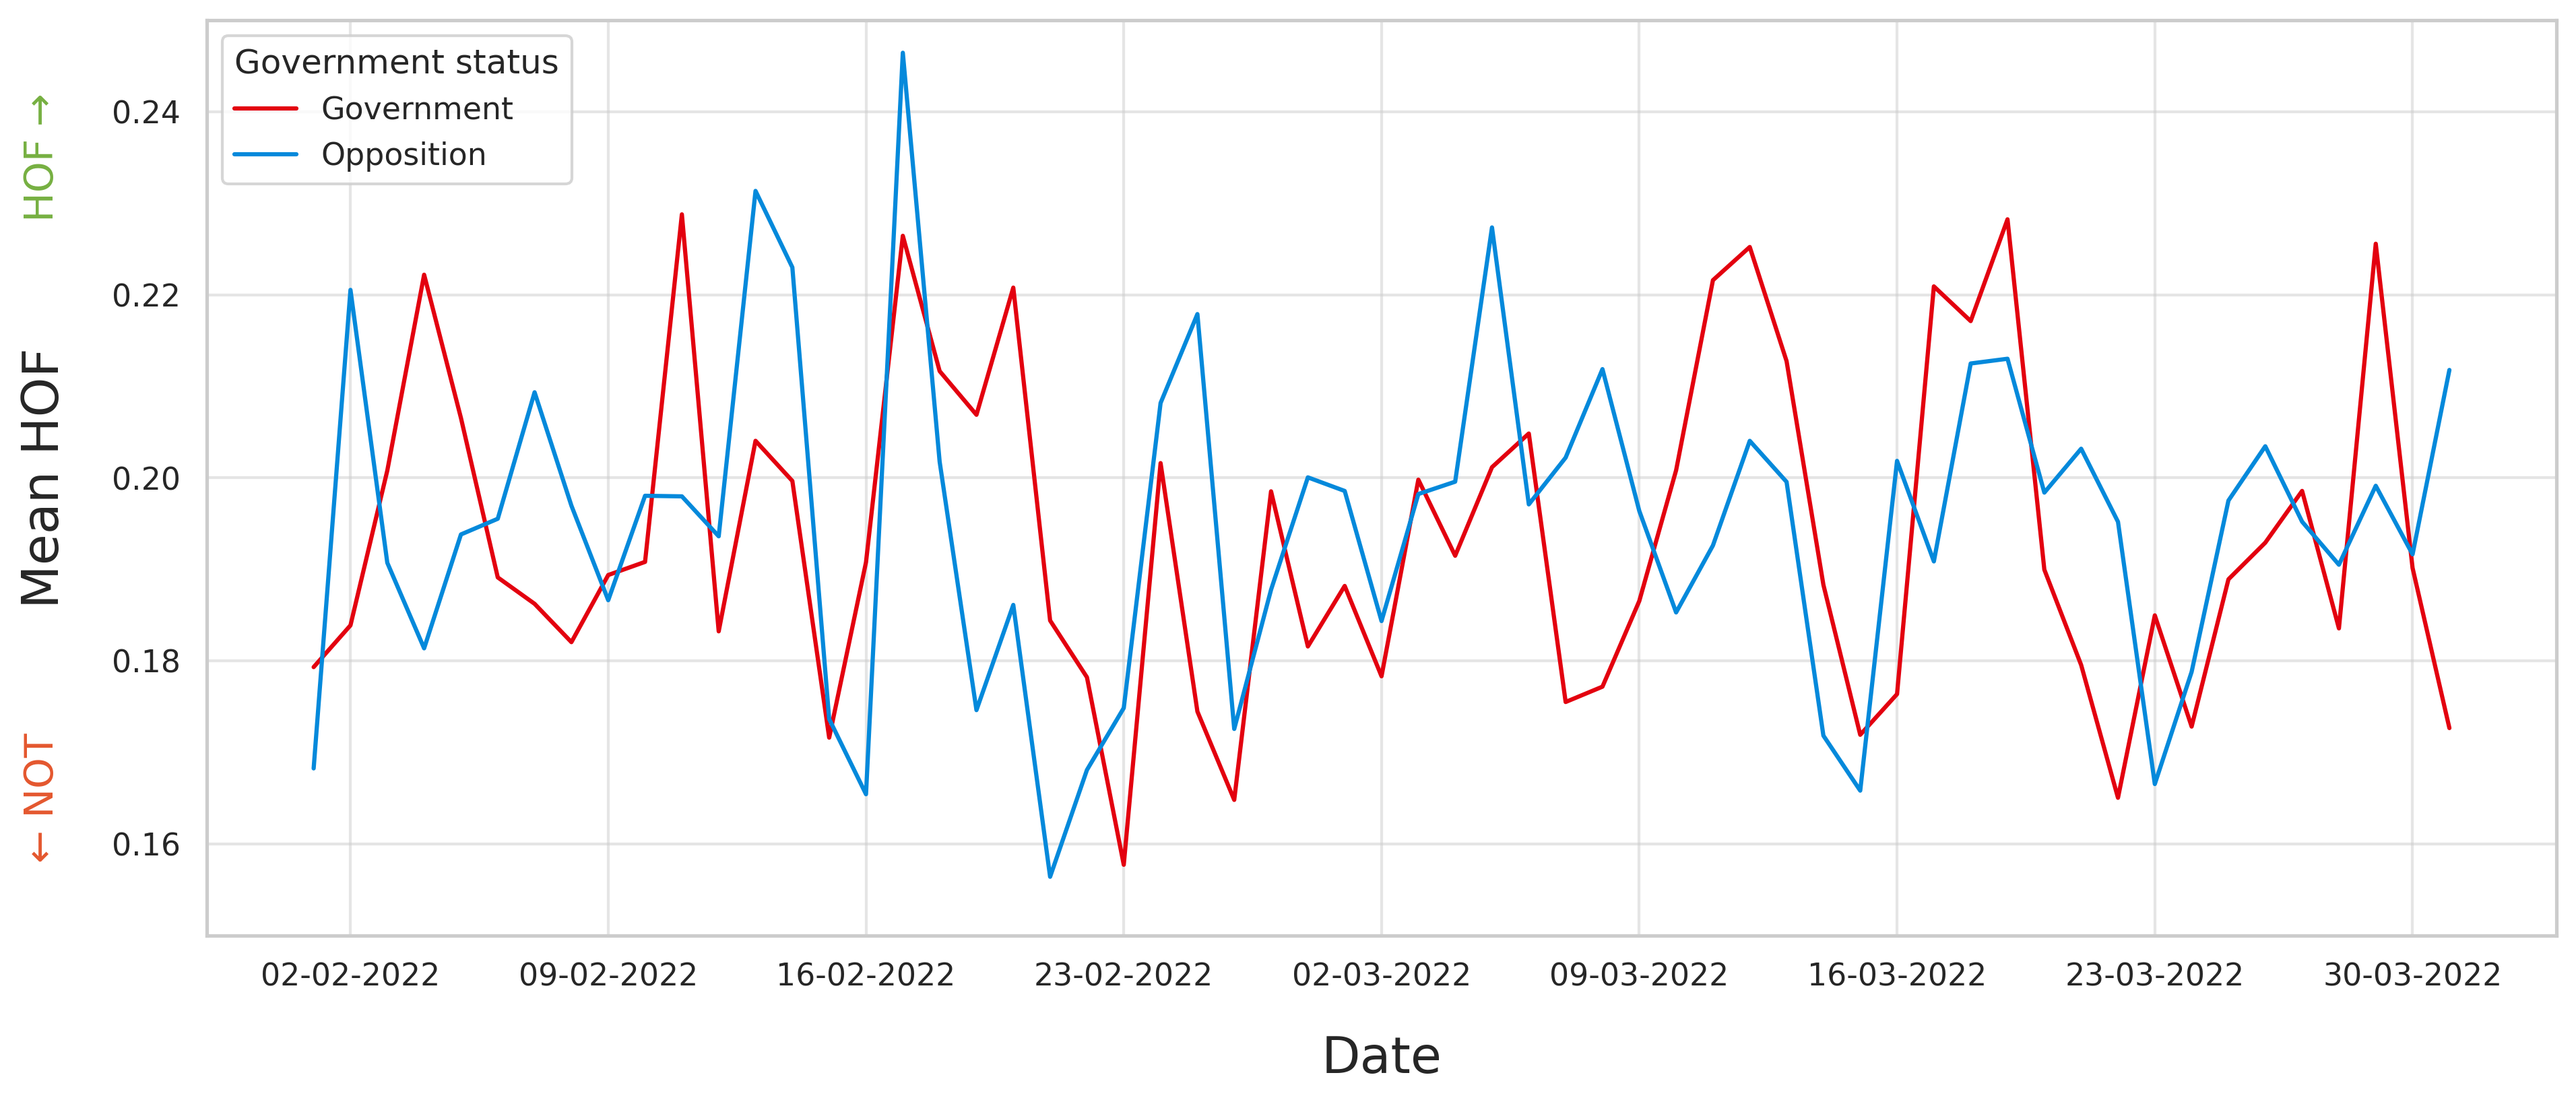

In [201]:
plot_reg_line_graph_for_each_day(reg_day_sentiment_df, "./plots/hof_regierung_over_time")

## Plot Percentage Distribution

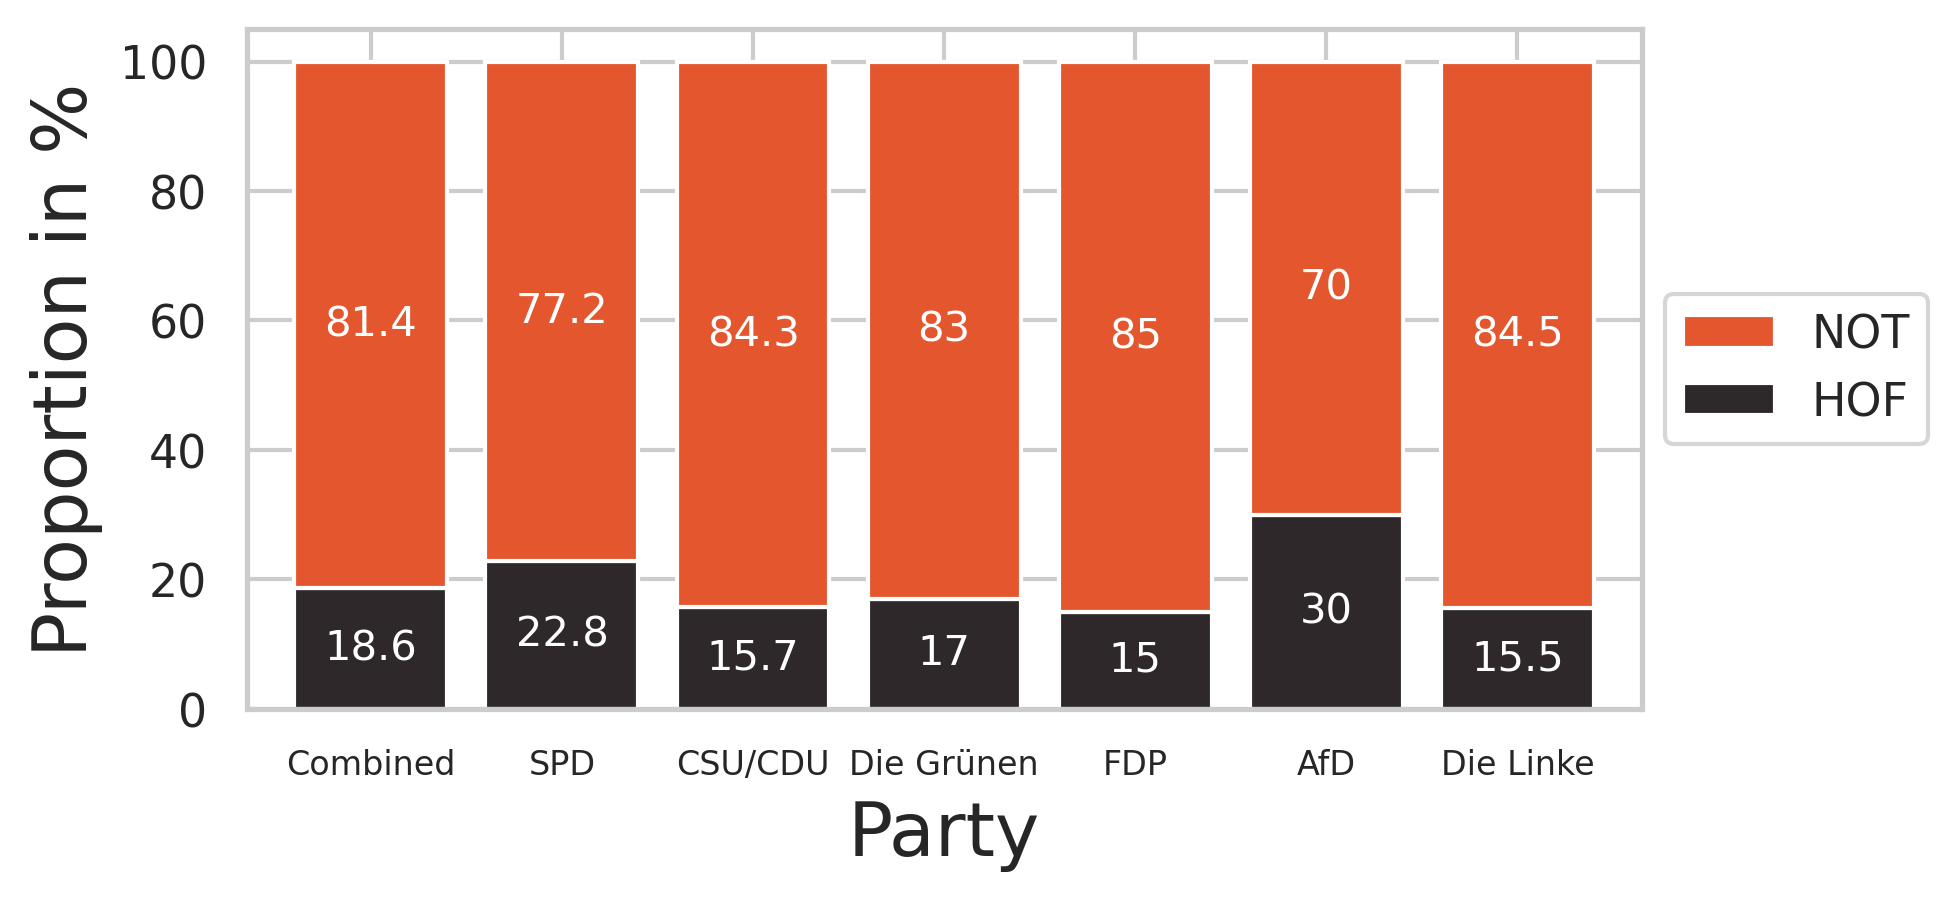

In [229]:
plot_percentage(df, "plots/percentage_distribution")

## Plot Gender

In [204]:
df = pd.read_csv("mentions_predicted_exploded.csv")
df.head(2)

Unnamed: 0.2  Unnamed: 0.1  index  Unnamed: 0     author_id      username  \
0             0             0      0           1  1.435941e+18  CHARLYCAPRI4   
1             1             1      1           2  5.286774e+08         jo711   

   author_followers  author_tweets  \
0                 1           14.0   
1                 6          308.0   

                                  author_description author_location  ...  \
0                                                NaN             NaN  ...   
1  Ewiger Revolluzer :-) ,\nBiker,Hundeverr√ºckt.N...              jo  ...   

  replies likes         mentioned           Runs  model_predictions  \
0     0.0   0.0  ['SWagenknecht']  Linke_polis_1                  0   
1     0.0   0.0  ['SWagenknecht']  Linke_polis_1                  0   

   mentioned_list              full_name       party  Geschlecht  \
0    swagenknecht  Dr. Sahra Wagenknecht   Die Linke        Frau   
1    swagenknecht  Dr. Sahra Wagenknecht   Die Linke        Frau   

  Gew√§hlt in Vorperiode  
0                    ja  
1                    ja  

[2 rows x 24 columns]

In [205]:
df["HOF"] = df["model_predictions"]
df.loc[(df.model_predictions == 1),'Label']='HOF'
df.loc[(df.model_predictions == 0),'Label']='NOT'

In [210]:
df.Geschlecht.value_counts()

Herrn    1907243
Frau      844881
Name: Geschlecht, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



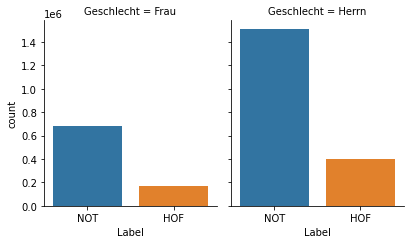

In [208]:
# Plot
g = sns.catplot("Label", col="Geschlecht", col_wrap=3,
                data=df,
                kind="count", height=3.5, aspect=.8, 
                palette='tab10')

#fig.suptitle('sf')
plt.show()
g.savefig('./plots/gender_hof_distribution.png')

## Hate per MP

In [213]:
hof = df[df["Label"] == "HOF"]
no = df[df["Label"] == "NOT"]

In [216]:
hof.full_name.value_counts()[:20]

Prof. Dr. Karl Lauterbach            142169
Dr. Janosch Dahmen                    35855
Olaf Scholz                           25181
Dr. Marco Buschmann                   24004
Stephan Brandner                      18035
Dr. Sahra Wagenknecht                 14881
Christian Lindner                     14806
Friedrich Merz                        13978
Dr. Marie-Agnes Strack-Zimmermann     13403
Beatrix von Storch                    12754
Emilia Fester                         12440
Dr. Ralf Stegner                      12399
Dr. Till Steffen                      12043
Dirk Wiese                            11811
Katrin Helling-Plahr                  11413
Dagmar Schmidt (Wetzlar)              11374
Dr. Norbert R√∂ttgen                   11237
Ricarda Lang                          10850
Tessa Ganserer                        10230
Katrin G√∂ring-Eckardt                  8230
Name: full_name, dtype: int64

In [217]:
no.full_name.value_counts()[:20]

Prof. Dr. Karl Lauterbach            402462
Dr. Marco Buschmann                  117462
Dr. Janosch Dahmen                   111810
Olaf Scholz                          108452
Christian Lindner                     78269
Friedrich Merz                        71610
Dr. Sahra Wagenknecht                 62242
Dr. Norbert R√∂ttgen                   56524
Ricarda Lang                          55462
Dr. Marie-Agnes Strack-Zimmermann     40523
Katrin G√∂ring-Eckardt                 36946
Dr. Till Steffen                      32114
Emilia Fester                         32009
Dirk Wiese                            30844
Dr. Ralf Stegner                      29777
Stephan Brandner                      29737
Katrin Helling-Plahr                  29050
Tessa Ganserer                        28836
Dagmar Schmidt (Wetzlar)              28532
Beatrix von Storch                    28386
Name: full_name, dtype: int64

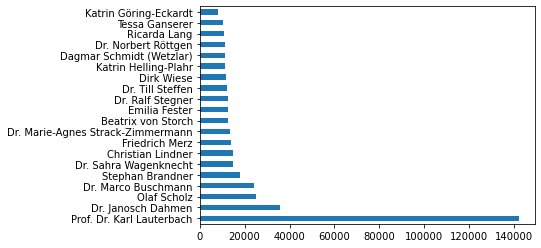

In [223]:
ax = hof['full_name'].value_counts()[:20].plot(kind='barh')
ax.figure.savefig("./plots/hof_on_mps.png")